# DataSet :- https://www.kaggle.com/datasets/mohamedelkahwagy/suoer-store-usa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [101]:
data = pd.read_excel("D:/Datas/Super Store dataset/SuperStoreUSA.xlsx")
pd.set_option('display.max_columns',None)
data.head(2) # Show The Data

,Customer Name,Customer ID,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Country,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,Maureen Stout,3146,19194,Critical,0.07,3.71,1.93,Express Air,Corporate,Office Supplies,Paper,Wrap Bag,"""While you Were Out"" Message Book, One Form pe...",0.35,United States,Central,Texas,Pharr,78577,2015-01-04,2015-01-06,6.3308,11,39.64,85850
1,Wayne Bass,2548,6525,Low,0.00,35.99,0.99,Regular Air,Small Business,Technology,Telephones and Communication,Small Pack,Accessory31,0.35,United States,West,California,Los Angeles,90068,2015-04-04,2015-04-11,840.0510,46,1477.57,46436


In [19]:
data.shape

(1952, 25)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1952 entries, 0 to 1951
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Customer Name         1952 non-null   object        
 1   Customer ID           1952 non-null   int64         
 2   Row ID                1952 non-null   int64         
 3   Order Priority        1952 non-null   object        
 4   Discount              1952 non-null   float64       
 5   Unit Price            1952 non-null   float64       
 6   Shipping Cost         1952 non-null   float64       
 7   Ship Mode             1952 non-null   object        
 8   Customer Segment      1952 non-null   object        
 9   Product Category      1952 non-null   object        
 10  Product Sub-Category  1952 non-null   object        
 11  Product Container     1952 non-null   object        
 12  Product Name          1952 non-null   object        
 13  Product Base Margi

In [20]:
# find null values
data.isnull().sum()

Customer Name            0
Customer ID              0
Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     16
Country                  0
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [21]:
# fill null values with mean values
data['Product Base Margin'].fillna(data['Product Base Margin'].mean(),inplace=True)

# Order Priority

In [31]:
# View No. of all Order Priority
data['Order Priority'].value_counts()

Order Priority
Low              398
Not Specified    396
Critical         391
High             391
Medium           376
Name: count, dtype: int64

In [32]:
# find unique values
data['Order Priority'].unique()

array(['Critical', 'Low', 'Medium', 'High', 'Not Specified'], dtype=object)

In [37]:
# remove space with replace
data['Order Priority']=data['Order Priority'].replace("Critical ","Critical")

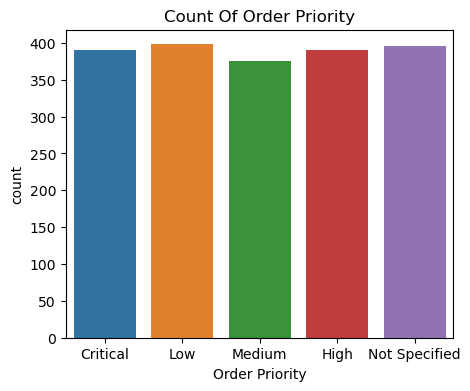

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=data)
plt.title("Count Of Order Priority")
# plt.savefig("Count Of Order Priority.jpg")
plt.show()

# Ship Mode

In [38]:
data['Ship Mode'].value_counts()

Ship Mode
Regular Air       1437
Delivery Truck     275
Express Air        240
Name: count, dtype: int64

In [40]:
x=data['Ship Mode'].value_counts().index # For lables
y=data['Ship Mode'].value_counts().values # For values

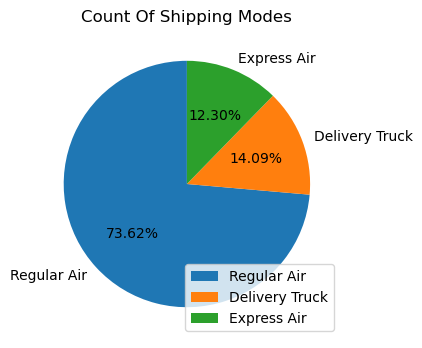

In [59]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle=90 ,autopct="%0.2f%%")
plt.legend(loc=0)
plt.title("Count Of Shipping Modes")
plt.show()

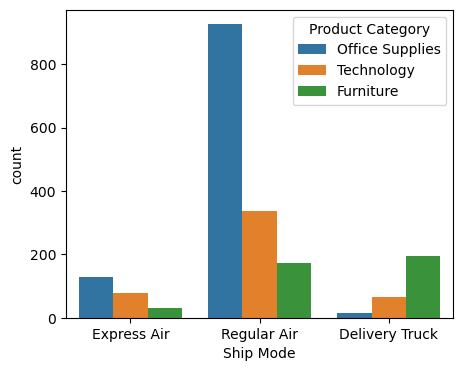

In [62]:
# Shipping Mode with Product category
plt.figure(figsize=(5,4))
sns.countplot(x="Ship Mode",data=data,hue="Product Category")
plt.show()

# Customer Segment

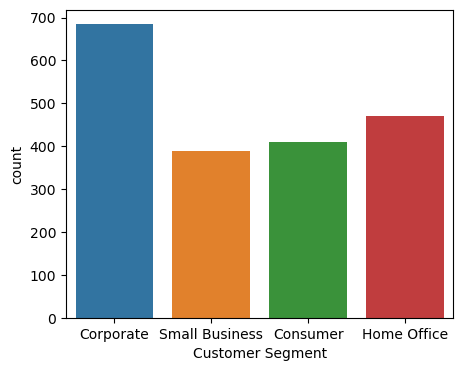

In [63]:
plt.figure(figsize=(5,4))
sns.countplot(x="Customer Segment",data=data)
plt.show()

# Product Category And Sub Category

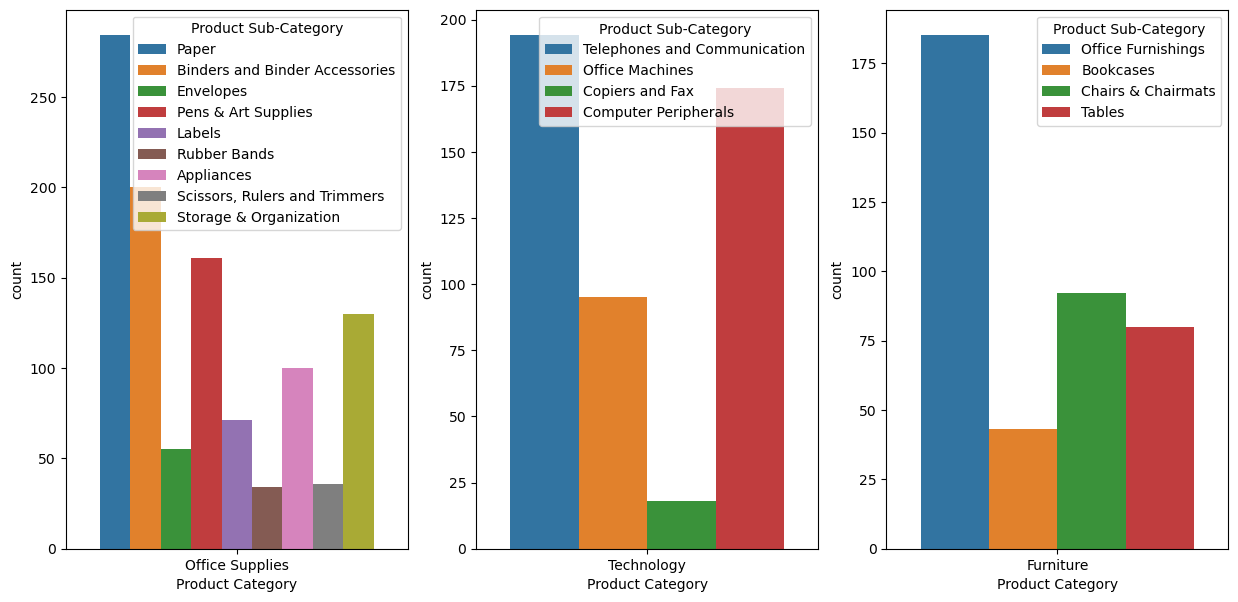

In [81]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
sns.countplot(x="Product Category",data=data[data['Product Category']=='Office Supplies'],hue="Product Sub-Category")
plt.subplot(1,3,2)
sns.countplot(x="Product Category",data=data[data['Product Category']=='Technology'],hue="Product Sub-Category")
plt.subplot(1,3,3)
sns.countplot(x="Product Category",data=data[data['Product Category']=='Furniture'],hue="Product Sub-Category")
plt.show()

# Profit By Product Category

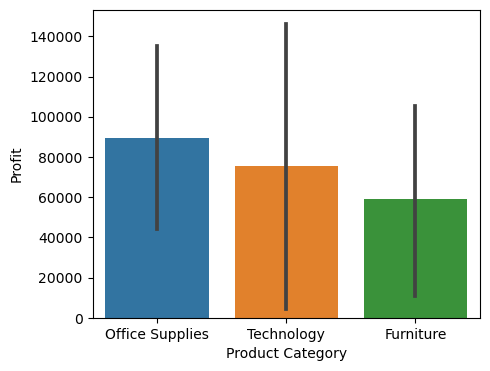

In [105]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category',y="Profit",data=data,estimator='sum')
plt.show()

# Product Base Margin By Product Category

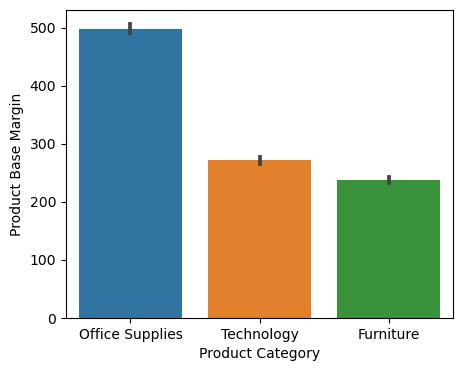

In [95]:
plt.figure(figsize=(5,4))
sns.barplot(x='Product Category',y="Product Base Margin",data=data,estimator='sum')
plt.show()

# No. Of Quantity Orderd By Product Sub Category

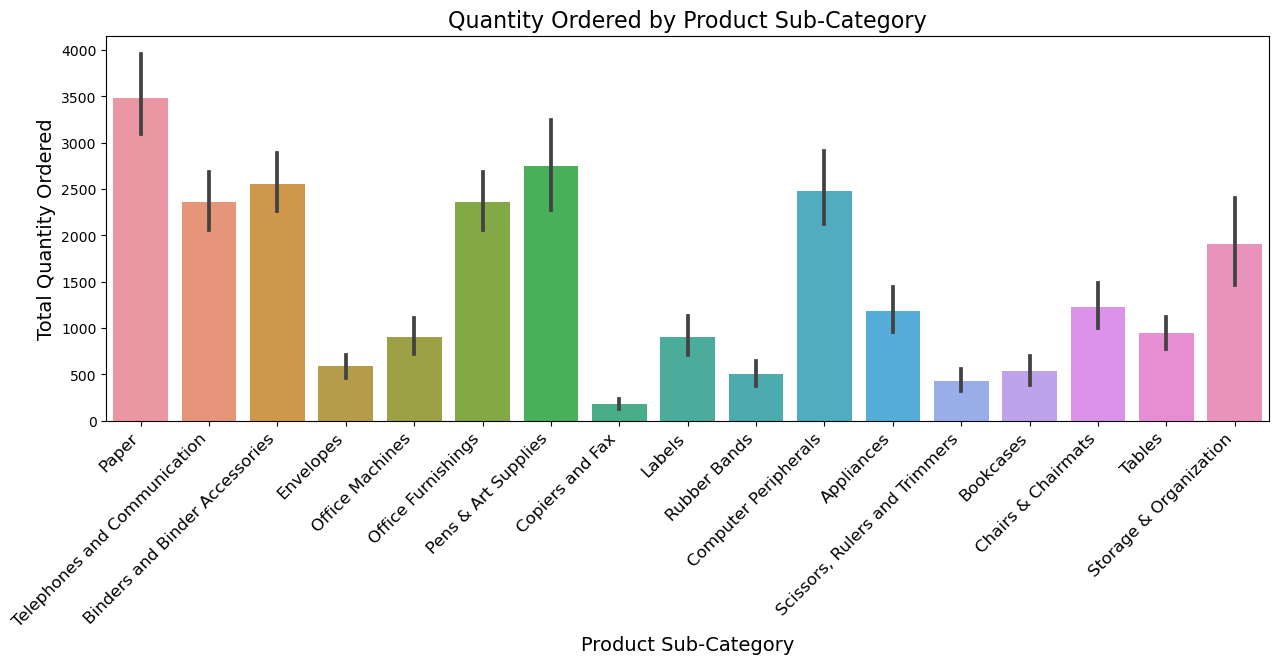

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(x='Product Sub-Category',y="Quantity ordered new",data=data,estimator='sum')
plt.xticks(rotation=45, fontsize=12, ha="right")  
plt.xlabel("Product Sub-Category", fontsize=14)
plt.ylabel("Total Quantity Ordered", fontsize=14)
plt.title("Quantity Ordered by Product Sub-Category", fontsize=16)
plt.show()